#### **CSV to Parquet Conversion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

In [ ]:
!pip install -q findspark
!pip install pyspark
!pip install py4j

import findspark
from pyspark.sql import functions as F
findspark.init()
findspark.find()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType

In [ ]:
schema = StructType([
    StructField("POOL_ID", StringType(), True),
    StructField("LOAN_ID", StringType(), True),
    StructField("ACT_PERIOD", StringType(), True),
    StructField("CHANNEL", StringType(), True),
    StructField("SELLER", StringType(), True),
    StructField("SERVICER", StringType(), True),
    StructField("MASTER_SERVICER", StringType(), True),
    StructField("ORIG_RATE", DoubleType(), True),
    StructField("CURR_RATE", DoubleType(), True),
    StructField("ORIG_UPB", DoubleType(), True),
    StructField("ISSUANCE_UPB", DoubleType(), True),
    StructField("CURRENT_UPB", DoubleType(), True),
    StructField("ORIG_TERM", DoubleType(), True),
    StructField("ORIG_DATE", StringType(), True),
    StructField("FIRST_PAY", StringType(), True),
    StructField("LOAN_AGE", DoubleType(), True),
    StructField("REM_MONTHS", DoubleType(), True),
    StructField("ADJ_REM_MONTHS", DoubleType(), True),
    StructField("MATR_DT", StringType(), True),
    StructField("OLTV", DoubleType(), True),
    StructField("OCLTV", DoubleType(), True),
    StructField("NUM_BO", StringType(), True),
    StructField("DTI", DoubleType(), True),
    StructField("CSCORE_B", DoubleType(), True),
    StructField("CSCORE_C", DoubleType(), True),
    StructField("FIRST_FLAG", StringType(), True),
    StructField("PURPOSE", StringType(), True),
    StructField("PROP", StringType(), True),
    StructField("NO_UNITS", DoubleType(), True),
    StructField("OCC_STAT", StringType(), True),
    StructField("STATE", StringType(), True),
    StructField("MSA", StringType(), True),
    StructField("ZIP", StringType(), True),
    StructField("MI_PCT", DoubleType(), True),
    StructField("PRODUCT", StringType(), True),
    StructField("PPMT_FLG", StringType(), True),
    StructField("IO", StringType(), True),
    StructField("FIRST_PAY_IO", StringType(), True),
    StructField("MNTHS_TO_AMTZ_IO", StringType(), True),
    StructField("DLQ_STATUS", DoubleType(), True),
    StructField("PMT_HISTORY", StringType(), True),
    StructField("MOD_FLAG", StringType(), True),
    StructField("MI_CANCEL_FLAG", StringType(), True),
    StructField("Zero_Bal_Code", StringType(), True),
    StructField("ZB_DTE", StringType(), True),
    StructField("LAST_UPB", StringType(), True),
    StructField("RPRCH_DTE", StringType(), True),
    StructField("CURR_SCHD_PRNCPL", DoubleType(), True),
    StructField("TOT_SCHD_PRNCPL", DoubleType(), True),
    StructField("UNSCHD_PRNCPL_CURR", DoubleType(), True),
    StructField("LAST_PAID_INSTALLMENT_DATE", StringType(), True),
    StructField("FORECLOSURE_DATE", StringType(), True),
    StructField("DISPOSITION_DATE", StringType(), True),
    StructField("FORECLOSURE_COSTS", DoubleType(), True),
    StructField("PROPERTY_PRESERVATION_AND_REPAIR_COSTS", DoubleType(), True),
    StructField("ASSET_RECOVERY_COSTS", DoubleType(), True),
    StructField("MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS", DoubleType(), True),
    StructField("ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", DoubleType(), True),
    StructField("NET_SALES_PROCEEDS", DoubleType(), True),
    StructField("CREDIT_ENHANCEMENT_PROCEEDS", DoubleType(), True),
    StructField("REPURCHASES_MAKE_WHOLE_PROCEEDS", DoubleType(), True),
    StructField("OTHER_FORECLOSURE_PROCEEDS", DoubleType(), True),
    StructField("NON_INTEREST_BEARING_UPB", DoubleType(), True),
    StructField("PRINCIPAL_FORGIVENESS_AMOUNT", DoubleType(), True),
    StructField("ORIGINAL_LIST_START_DATE", StringType(), True),
    StructField("ORIGINAL_LIST_PRICE", DoubleType(), True),
    StructField("CURRENT_LIST_START_DATE", StringType(), True),
    StructField("CURRENT_LIST_PRICE", DoubleType(), True),
    StructField("ISSUE_SCOREB", DoubleType(), True),
    StructField("ISSUE_SCOREC", DoubleType(), True),
    StructField("CURR_SCOREB", DoubleType(), True),
    StructField("CURR_SCOREC", DoubleType(), True),
    StructField("MI_TYPE", StringType(), True),
    StructField("SERV_IND", DoubleType(), True),
    StructField("CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT", DoubleType(), True),
    StructField("CUMULATIVE_MODIFICATION_LOSS_AMOUNT", DoubleType(), True),
    StructField("CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS", DoubleType(), True),
    StructField("CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", DoubleType(), True),
    StructField("HOMEREADY_PROGRAM_INDICATOR", StringType(), True),
    StructField("FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", DoubleType(), True),
    StructField("RELOCATION_MORTGAGE_INDICATOR", StringType(), True),
    StructField("ZERO_BALANCE_CODE_CHANGE_DATE", StringType(), True),
    StructField("LOAN_HOLDBACK_INDICATOR", StringType(), True),
    StructField("LOAN_HOLDBACK_EFFECTIVE_DATE", StringType(), True),
    StructField("DELINQUENT_ACCRUED_INTEREST", DoubleType(), True),
    StructField("PROPERTY_INSPECTION_WAIVER_INDICATOR", StringType(), True),
    StructField("HIGH_BALANCE_LOAN_INDICATOR", StringType(), True),
    StructField("ARM_5_YR_INDICATOR", StringType(), True),
    StructField("ARM_PRODUCT_TYPE", StringType(), True),
    StructField("MONTHS_UNTIL_FIRST_PAYMENT_RESET", DoubleType(), True),
    StructField("MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET", DoubleType(), True),
    StructField("INTEREST_RATE_CHANGE_DATE", StringType(), True),
    StructField("PAYMENT_CHANGE_DATE", StringType(), True),
    StructField("ARM_INDEX", StringType(), True),
    StructField("ARM_CAP_STRUCTURE", StringType(), True),
    StructField("INITIAL_INTEREST_RATE_CAP", DoubleType(), True),
    StructField("PERIODIC_INTEREST_RATE_CAP", DoubleType(), True),
    StructField("LIFETIME_INTEREST_RATE_CAP", DoubleType(), True),
    StructField("MARGIN", DoubleType(), True),
    StructField("BALLOON_INDICATOR", StringType(), True),
    StructField("PLAN_NUMBER", StringType(), True),
    StructField("FORBEARANCE_INDICATOR", StringType(), True),
    StructField("HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR", StringType(), True),
    StructField("DEAL_NAME", StringType(), True),
    StructField("RE_PROCS_FLAG", StringType(), True),
    StructField("ADR_TYPE", StringType(), True),
    StructField("ADR_COUNT", DoubleType(), True),
    StructField("ADR_UPB", DoubleType(), True),
    StructField("PAYMENT_DEFERRAL_MOD_EVENT_FLAG", StringType(), True),
    StructField("INTEREST_BEARING_UPB", DoubleType(), True)
])

#### **Year 2002**

2002 Quarter 1

In [ ]:
zip_path1 = '/content/drive/MyDrive/Big Data/2002Q1.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
spark = SparkSession.builder.appName("ConvertToParquet").getOrCreate()

df1 = spark.read.csv(f"{extract_path}/2002Q1.csv", sep='|', header=True, schema=schema)

parquet_path1 = extract_path + '/2002Q1_parquet'

df1.write.mode("overwrite").parquet(parquet_path1)

In [ ]:
parquet_df_2002Q1 = spark.read.parquet(parquet_path1)
parquet_df_2002Q1.show()

2002 Quarter 2

In [ ]:
zip_path2 = '/content/drive/MyDrive/Big Data/2002Q2.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df2 = spark.read.csv(f"{extract_path}/2002Q2.csv", sep='|', header=True, schema=schema)

parquet_path2 = extract_path + '/2002Q2_parquet'

df2.write.mode("overwrite").parquet(parquet_path2)

In [ ]:
parquet_df_2002Q2 = spark.read.parquet(parquet_path2)
parquet_df_2002Q2.show()

2002 Quarter 3

In [ ]:
zip_path3 = '/content/drive/MyDrive/Big Data/2002Q3.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path3, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df3 = spark.read.csv(f"{extract_path}/2002Q3.csv", sep='|', header=True, schema=schema)

parquet_path3 = extract_path + '/2002Q3_parquet'

df3.write.mode("overwrite").parquet(parquet_path3)

In [ ]:
parquet_df_2002Q3 = spark.read.parquet(parquet_path3)
parquet_df_2002Q3.show()

2002 Quarter 4

In [ ]:
zip_path4 = '/content/drive/MyDrive/Big Data/2002Q4.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path4, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df4 = spark.read.csv(f"{extract_path}/2002Q4.csv", sep='|', header=True, schema=schema)

parquet_path4 = extract_path + '/2002Q4_parquet'

df4.write.mode("overwrite").parquet(parquet_path4)

In [ ]:
parquet_df_2002Q4 = spark.read.parquet(parquet_path4)
parquet_df_2002Q4.show()

#### **Year 2003**

2003 Quarter 1

In [ ]:
zip_path5 = '/content/drive/MyDrive/Big Data/2003Q1.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path5, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df5 = spark.read.csv(f"{extract_path}/2003Q1.csv", sep='|', header=True, schema=schema)

parquet_path5 = extract_path + '/Big Data_parquet2003Q1'

df5.write.mode("overwrite").parquet(parquet_path5)

In [ ]:
parquet_df_2003Q1 = spark.read.parquet(parquet_path5)
parquet_df_2003Q1.show()

2003 Quarter 2

In [ ]:
zip_path6 = '/content/drive/MyDrive/Big Data/2003Q2.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path6, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df6 = spark.read.csv(f"{extract_path}/2003Q2.csv", sep='|', header=True, schema=schema)

parquet_path6 = extract_path + '/Big Data_parquet2003Q2'

df6.write.mode("overwrite").parquet(parquet_path6)

In [ ]:
parquet_df_2003Q2 = spark.read.parquet(parquet_path6)
parquet_df_2003Q2.show()

2003 Quarter 3

In [ ]:
zip_path7 = '/content/drive/MyDrive/Big Data/2003Q3.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path7, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df7 = spark.read.csv(f"{extract_path}/2003Q3.csv", sep='|', header=True, schema=schema)

parquet_path7 = extract_path + '/Big Data_parquet2003Q3'

df7.write.mode("overwrite").parquet(parquet_path7)

In [ ]:
parquet_df_2003Q3 = spark.read.parquet(parquet_path7)
parquet_df_2003Q3.show()

2003 Quarter 4

In [ ]:
zip_path8 = '/content/drive/MyDrive/Big Data/2003Q4.zip'
extract_path = '/content/drive/MyDrive/Big Data'

with zipfile.ZipFile(zip_path8, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
df8 = spark.read.csv(f"{extract_path}/2003Q4.csv", sep='|', header=True, schema=schema)

parquet_path8 = extract_path + '/Big Data_parquet2003Q4'

df8.write.mode("overwrite").parquet(parquet_path8)

In [ ]:
parquet_df_2003Q4 = spark.read.parquet(parquet_path8)
parquet_df_2003Q4.show()

#### **Data Cleaning**

In [ ]:
from pyspark.sql.functions import col, sum, when, substring, count, round, asc

In [ ]:
spark = SparkSession.builder.appName("LoanAnalysis").getOrCreate()

In [ ]:
df_2002Q1 = spark.read.parquet('/content/drive/MyDrive/Big Data/2002Q1_parquet')
df_2002Q2 = spark.read.parquet('/content/drive/MyDrive/Big Data/2002Q2_parquet')
df_2002Q3 = spark.read.parquet('/content/drive/MyDrive/Big Data/2002Q3_parquet')
df_2002Q4 = spark.read.parquet('/content/drive/MyDrive/Big Data/2002Q4_parquet')
df_2003Q1 = spark.read.parquet('/content/drive/MyDrive/Big Data/Big Data_parquet2003Q1')
df_2003Q2 = spark.read.parquet('/content/drive/MyDrive/Big Data/Big Data_parquet2003Q2')
df_2003Q3 = spark.read.parquet('/content/drive/MyDrive/Big Data/Big Data_parquet2003Q3')
df_2003Q4 = spark.read.parquet('/content/drive/MyDrive/Big Data/Big Data_parquet2003Q4')

df_combined = (
    df_2002Q1.union(df_2002Q2)
             .union(df_2002Q3)
             .union(df_2002Q4)
             .union(df_2003Q1)
             .union(df_2003Q2)
             .union(df_2003Q3)
             .union(df_2003Q4))

df_combined.show(50)

+-------+------------+----------+-------+--------------------+--------------------+---------------+---------+---------+--------+------------+-----------+---------+---------+---------+--------+----------+--------------+-------+----+-----+------+---+--------+--------+----------+-------+----+--------+--------+-----+-----+---+------+-------+--------+----+------------+----------------+----------+-----------+--------+--------------+-------------+------+--------+---------+----------------+---------------+------------------+--------------------------+----------------+----------------+-----------------+--------------------------------------+--------------------+------------------------------------------+-------------------------------------+------------------+---------------------------+-------------------------------+--------------------------+------------------------+----------------------------+------------------------+-------------------+-----------------------+------------------+----------

In [ ]:
columns_to_drop = [
    'POOL_ID', 'MASTER_SERVICER', 'ZERO_BALANCE_CODE_CHANGE_DATE', 'ZIP', 'MSA',
    'SERV_IND', 'DEAL_NAME', 'RE_PROCS_FLAG', 'ADR_TYPE', 'ADR_COUNT', 'ADR_UPB',
    'PAYMENT_DEFERRAL_MOD_EVENT_FLAG', 'INTEREST_BEARING_UPB', 'FIRST_FLAG', 'PURPOSE', 'PROP',
    'NUM_BO', 'DTI', 'PMT_HISTORY', 'MOD_FLAG', 'MI_CANCEL_FLAG', 'RPRCH_DTE',
    'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE', 'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS',
    'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
    'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'PRINCIPAL_FORGIVENESS_AMOUNT', 'ISSUE_SCOREB', 'ISSUE_SCOREC', 'CURR_SCOREB',
    'CURR_SCOREC', 'MI_TYPE', 'CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT', 'CUMULATIVE_MODIFICATION_LOSS_AMOUNT',
    'CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS', 'CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS',
    'HOMEREADY_PROGRAM_INDICATOR', 'FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT', 'RELOCATION_MORTGAGE_INDICATOR',
    'ZERO_BALANCE_CODE_CHANGE_DATE', 'LOAN_HOLDBACK_INDICATOR', 'LOAN_HOLDBACK_EFFECTIVE_DATE',
    'DELINQUENT_ACCRUED_INTEREST', 'PROPERTY_INSPECTION_WAIVER_INDICATOR', 'HIGH_BALANCE_LOAN_INDICATOR',
    'ARM_5_YR_INDICATOR', 'ARM_PRODUCT_TYPE', 'MONTHS_UNTIL_FIRST_PAYMENT_RESET', 'MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET',
    'INTEREST_RATE_CHANGE_DATE', 'PAYMENT_CHANGE_DATE', 'ARM_INDEX', 'ARM_CAP_STRUCTURE', 'INITIAL_INTEREST_RATE_CAP',
    'PERIODIC_INTEREST_RATE_CAP', 'LIFETIME_INTEREST_RATE_CAP', 'MARGIN', 'BALLOON_INDICATOR', 'PLAN_NUMBER']

df_cleaned = df_combined.drop(*columns_to_drop) # dropping irrelevant columns

df_cleaned.printSchema() # cleaned data schema

root
 |-- LOAN_ID: string (nullable = true)
 |-- ACT_PERIOD: string (nullable = true)
 |-- CHANNEL: string (nullable = true)
 |-- SELLER: string (nullable = true)
 |-- SERVICER: string (nullable = true)
 |-- ORIG_RATE: double (nullable = true)
 |-- CURR_RATE: double (nullable = true)
 |-- ORIG_UPB: double (nullable = true)
 |-- ISSUANCE_UPB: double (nullable = true)
 |-- CURRENT_UPB: double (nullable = true)
 |-- ORIG_TERM: double (nullable = true)
 |-- ORIG_DATE: string (nullable = true)
 |-- FIRST_PAY: string (nullable = true)
 |-- LOAN_AGE: double (nullable = true)
 |-- REM_MONTHS: double (nullable = true)
 |-- ADJ_REM_MONTHS: double (nullable = true)
 |-- MATR_DT: string (nullable = true)
 |-- OLTV: double (nullable = true)
 |-- OCLTV: double (nullable = true)
 |-- CSCORE_B: double (nullable = true)
 |-- CSCORE_C: double (nullable = true)
 |-- NO_UNITS: double (nullable = true)
 |-- OCC_STAT: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- MI_PCT: double (nullabl

In [ ]:
df_cleaned = df_cleaned.filter(
    (substring(col("ORIG_DATE"), 3, 4).isin(["2002", "2003"])) &
    (col("NO_UNITS") == 1)
)

In [ ]:
df_cleaned = df_cleaned.withColumn("Year", F.substring("ORIG_DATE", 3, 4).cast("int")) \
                       .withColumn("Month", F.substring("ORIG_DATE", 1, 2).cast("int"))

In [ ]:
df_cleaned.show(50)

+------------+----------+-------+--------------------+--------------------+---------+---------+--------+------------+-----------+---------+---------+---------+--------+----------+--------------+-------+----+-----+--------+--------+--------+--------+-----+------+-------+--------+----+------------+----------------+----------+-------------+--------+----------------+---------------+------------------+------------------+---------------------------+-------------------------------+--------------------------+------------------------+------------------------+-------------------+-----------------------+------------------+---------------------+--------------------------------------------------+----+-----+
|     LOAN_ID|ACT_PERIOD|CHANNEL|              SELLER|            SERVICER|ORIG_RATE|CURR_RATE|ORIG_UPB|ISSUANCE_UPB|CURRENT_UPB|ORIG_TERM|ORIG_DATE|FIRST_PAY|LOAN_AGE|REM_MONTHS|ADJ_REM_MONTHS|MATR_DT|OLTV|OCLTV|CSCORE_B|CSCORE_C|NO_UNITS|OCC_STAT|STATE|MI_PCT|PRODUCT|PPMT_FLG|  IO|FIRST_PAY_IO

#### **Compare the average FICO across the two years.**

In [ ]:
avg_fico = df_cleaned.groupBy("Year") \
                     .agg(F.avg("CSCORE_B").alias("Average_FICO"))
avg_fico.show()

+----+-----------------+
|Year|     Average_FICO|
+----+-----------------+
|2002| 727.315967283002|
|2003|732.2352057070599|
+----+-----------------+



#### The creditworthiness has only slightly increased form 2002 to 2003 with slight increase in average FICO score.

#### **The monthly delinquency rates for 30, 60 and 90 days past due and how they vary by loan term.**

In [ ]:
df_cleaned = df_cleaned.withColumn("ORIG_TERM", col("ORIG_TERM").cast("int")) # converting into int

df_cleaned = df_cleaned.withColumn("30_Days_Past_Due", when(col("DLQ_STATUS") == 1, 1).otherwise(0)) # defining deliquency categories
df_cleaned = df_cleaned.withColumn("60_Days_Past_Due", when(col("DLQ_STATUS") == 2, 1).otherwise(0))
df_cleaned = df_cleaned.withColumn("90_Days_Past_Due", when(col("DLQ_STATUS") >= 3, 1).otherwise(0))

delinquency_rates = df_cleaned.groupBy("ORIG_TERM").agg(
    sum("30_Days_Past_Due").alias("30_Days_Past_Due"),
    sum("60_Days_Past_Due").alias("60_Days_Past_Due"),
    sum("90_Days_Past_Due").alias("90_Days_Past_Due"),
    count("*").alias("Total_Loans"))

delinquency_rates = delinquency_rates.withColumns({
    "30_Day_Rate": round((col("30_Days_Past_Due") / col("Total_Loans")) * 100, 2),
    "60_Day_Rate": round((col("60_Days_Past_Due") / col("Total_Loans")) * 100, 2),
    "90_Day_Rate": round((col("90_Days_Past_Due") / col("Total_Loans")) * 100, 2)})

delinquency_rates = delinquency_rates.withColumnRenamed("ORIG_TERM", "Original Loan Term")

delinquency_rates.show(truncate=False)

+------------------+----------------+----------------+----------------+-----------+-----------+-----------+-----------+
|Original Loan Term|30_Days_Past_Due|60_Days_Past_Due|90_Days_Past_Due|Total_Loans|30_Day_Rate|60_Day_Rate|90_Day_Rate|
+------------------+----------------+----------------+----------------+-----------+-----------+-----------+-----------+
|108               |125             |5               |6               |42411      |0.29       |0.01       |0.01       |
|300               |79138           |18879           |45726           |4994417    |1.58       |0.38       |0.92       |
|332               |178             |54              |95              |9714       |1.83       |0.56       |0.98       |
|329               |64              |8               |106             |8212       |0.78       |0.1        |1.29       |
|103               |1               |0               |0               |3560       |0.03       |0.0        |0.0        |
|350               |850             |185

#### Loans with longer terms are more likely to have higher delinquency rates, especially as they get older (90 days past due). Larger loan volumes tend to lead to more delinquencies. On the other hand, shorter-term loans generally show fewer issues with late payments.

#### **Stacked bar chart showing the poor, fair good, very good, and excellent credit score with a mortgage per state for first time buyers.**

In [ ]:
df_cleaned.select("CSCORE_B").describe().show() # statistical summary

+-------+-----------------+
|summary|         CSCORE_B|
+-------+-----------------+
|  count|        522191770|
|   mean|730.4292177297241|
| stddev| 55.0536478222193|
|    min|            300.0|
|    max|            850.0|
+-------+-----------------+



In [ ]:
filtered_df = df_cleaned.withColumn(
    "Credit_Score_Category",
    F.when(F.col("CSCORE_B") < 580, "Poor")
    .when((F.col("CSCORE_B") >= 580) & (F.col("CSCORE_B") <= 669), "Fair")
    .when((F.col("CSCORE_B") >= 670) & (F.col("CSCORE_B") <= 739), "Good")
    .when((F.col("CSCORE_B") >= 740) & (F.col("CSCORE_B") <= 799), "Very Good")
    .when((F.col("CSCORE_B") >= 800) & (F.col("CSCORE_B") <= 850), "Excellent")
    .otherwise("Unknown"))

In [ ]:
filtered_df = filtered_df.filter(
    F.col("STATE").isNotNull() & F.col("Credit_Score_Category").isNotNull())

In [ ]:
credit_score_counts = filtered_df.groupBy("STATE", "Credit_Score_Category") \
    .agg(F.count("*").alias("Loan_Count")) \
    .orderBy("STATE", "Credit_Score_Category")

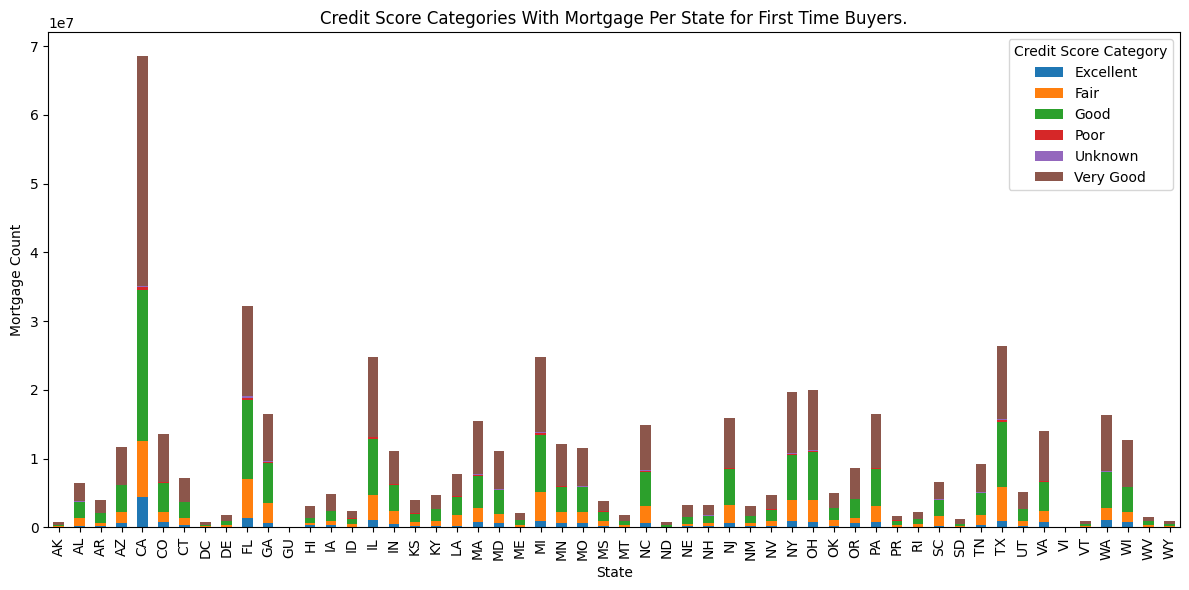

In [ ]:
credit_score_counts_pd = credit_score_counts.toPandas() # converting to pandas for plotting

pivot_data = credit_score_counts_pd.pivot(index="STATE", columns="Credit_Score_Category", values="Loan_Count") # pivotting

pivot_data.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Credit Score Categories With Mortgage Per State for First Time Buyers.")
plt.xlabel("State")
plt.ylabel("Mortgage Count")
plt.legend(title="Credit Score Category")
plt.tight_layout()
plt.show()

#### Californina has the highest mortgage count, followed by Florida, Texas, Michigan and Illinois, with first time buyers having very good credit score across all the states.

#### **Analyze correlations between the FICO Score, LTV Ratio, and Interest Rate with the loan status.**

In [ ]:
filtered_df = filtered_df.filter(
    F.col("CSCORE_B").isNotNull() &
    F.col("OLTV").isNotNull() &
    F.col("ORIG_RATE").isNotNull() &
    F.col("DLQ_STATUS").isNotNull())

In [ ]:
filtered_df = filtered_df.withColumn(
    "Loan_Status_Numeric",
    F.when(F.col("DLQ_STATUS") == 0, 0)
    .otherwise(1))

In [ ]:
fico_corr = filtered_df.stat.corr("CSCORE_B", "Loan_Status_Numeric")
ltv_corr = filtered_df.stat.corr("OLTV", "Loan_Status_Numeric")
rate_corr = filtered_df.stat.corr("ORIG_RATE", "Loan_Status_Numeric")

print(f"Correlation between FICO Score and Loan Status: {fico_corr}")
print(f"Correlation between LTV Ratio and Loan Status: {ltv_corr}")
print(f"Correlation between Interest Rate and Loan Status: {rate_corr}")

Correlation between FICO Score and Loan Status: -0.17328153716027103
Correlation between LTV Ratio and Loan Status: 0.07775783891738271
Correlation between Interest Rate and Loan Status: 0.08098372358231694


#### Borrowers with higher FICO scores tend to have better loan performance and are less likely to default. On the other hand, loans with higher LTV ratios and interest rates show a slight increase in delinquency risk, but the effect is not very strong.

#### **Distribution of FICO Scores, LTV Ratios, and Interest Rates across different loan statuses (performing, delinquent, defaulted).**  

In [ ]:
from pyspark.sql.functions import col, when, concat, lit, count, round, mean, variance, percentile_approx, coalesce, abs, concat_ws, to_date

In [ ]:
# Create new column with labels regarding loan status
df_filtered = df_cleaned.withColumn(
    "LOAN_STATUS",
    when(col("DLQ_STATUS") == 0, "Performing")
    .when((col("DLQ_STATUS") == 1) | (col("DLQ_STATUS") == 2), "Delinquent")
    .when(col("DLQ_STATUS") >= 3, "Defaulted")
    .otherwise("Unknown")
)

# Fliter tha data with loan status
df_filtered = df_filtered.filter(col("LOAN_STATUS") != "Unknown")

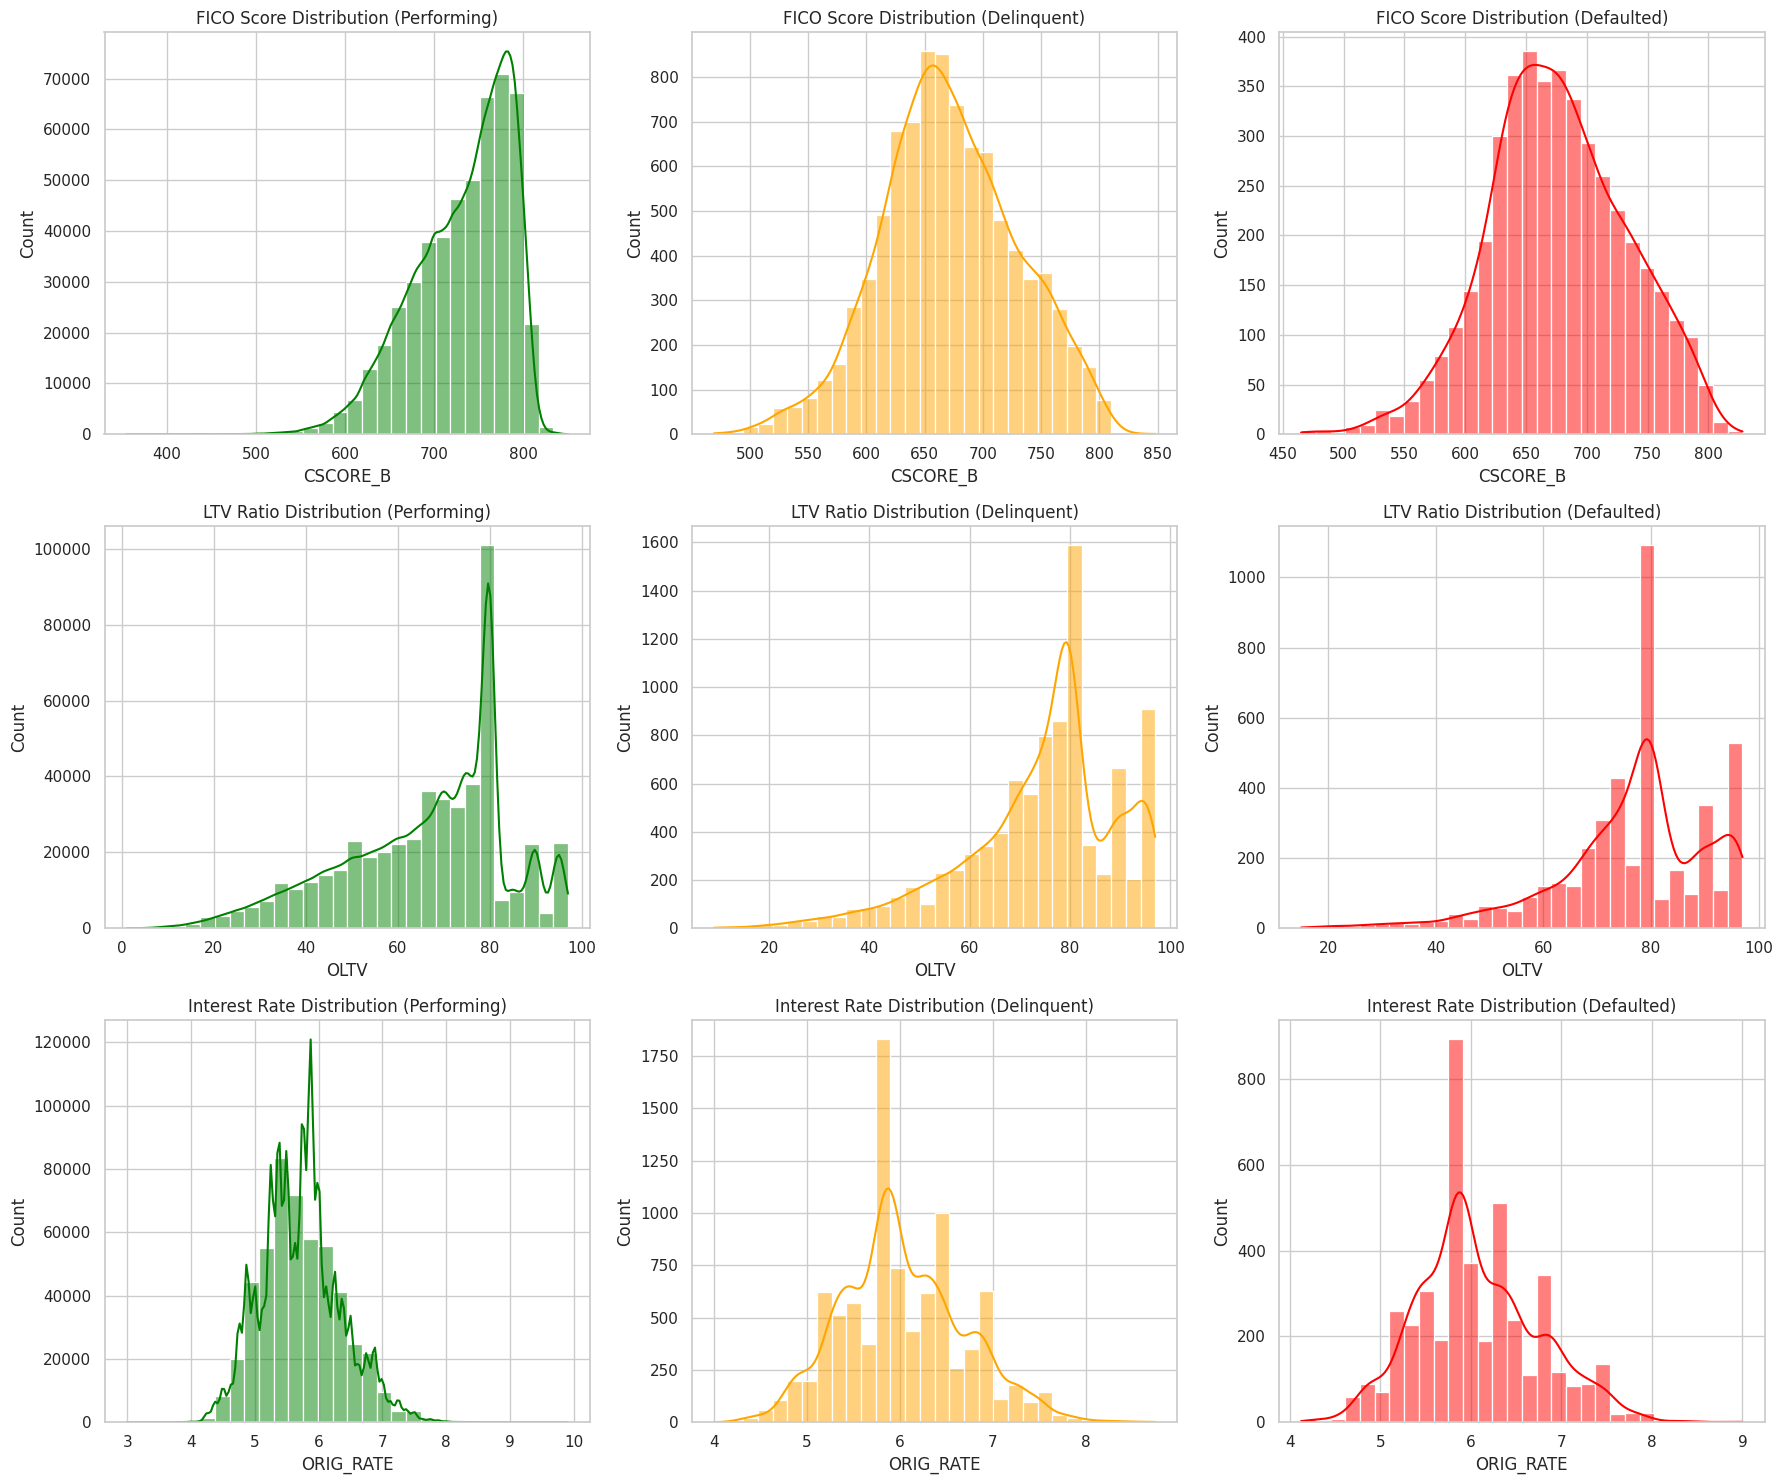

In [ ]:
sns.set(style="whitegrid")

loan_statuses = ["Performing", "Delinquent", "Defaulted"]
colors = ["green", "orange", "Red"]

columns = ["CSCORE_B", "OLTV", "ORIG_RATE"]
titles = ["FICO Score Distribution", "LTV Ratio Distribution", "Interest Rate Distribution"]

# Sample the data for visualization
sample_fraction = 0.001

df_sample = df_filtered.sample(fraction=sample_fraction, seed=42).select(
    "CSCORE_B", "OLTV", "ORIG_RATE", "LOAN_STATUS").toPandas()

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for row, col_name in enumerate(columns):
    for col, status in enumerate(loan_statuses):
        df_subset = df_sample[df_sample["LOAN_STATUS"] == status]

        sns.histplot(
            data=df_subset,
            x=col_name,
            bins=30,
            kde=True,
            color=colors[col],
            ax=axes[row, col]
        )
        axes[row, col].set_title(f"{titles[row]} ({status})")

plt.tight_layout()
plt.show()

The analysis shows that performing loans are associated with higher FICO scores, moderate LTV ratios, and lower interest rates, while delinquent and defaulted loans tend to have lower credit scores, higher LTV ratios, and higher interest rates.

These findings highlight the need for stricter underwriting for high-LTV loans, better credit risk management, and refinancing options for at-risk borrowers to reduce default rates and maintain financial stability.

#### **Compare default rates for loans originated in different quarters to assess if default risk has changed over time.**

In [ ]:
df_filtered = df_filtered.withColumn("Month", col("Month").cast("int"))

df_filtered = df_filtered.withColumn(
    "Quarter",
    when(col("Month").between(1, 3), lit("Q1"))
    .when(col("Month").between(4, 6), lit("Q2"))
    .when(col("Month").between(7, 9), lit("Q3"))
    .when(col("Month").between(10, 12), lit("Q4"))
)

# Aggregate by each quarter
df_filtered = df_filtered.withColumn("Year_Quarter", concat(col("Year"), lit("-"), col("Quarter")))

In [ ]:
# Compute the loan amounts and the default rate
total_loans_per_quarter = df_filtered.groupBy("Year_Quarter").count().withColumnRenamed("count", "TOTAL_LOANS")
defaulted_loans_per_quarter = df_filtered.filter(col("LOAN_STATUS") == "Defaulted") \
                                         .groupBy("Year_Quarter").count().withColumnRenamed("count", "DEFAULTED_LOANS")
df_default_rate = total_loans_per_quarter.join(defaulted_loans_per_quarter, "Year_Quarter", "left").fillna(0)
df_default_rate = df_default_rate.withColumn("DEFAULT_RATE(%)", round((col("DEFAULTED_LOANS") / col("TOTAL_LOANS")) * 100,2))
df_default_rate = df_default_rate.orderBy("Year_Quarter")

df_default_rate.show()

+------------+-----------+---------------+---------------+
|Year_Quarter|TOTAL_LOANS|DEFAULTED_LOANS|DEFAULT_RATE(%)|
+------------+-----------+---------------+---------------+
|     2002-Q1|   29582826|         322355|           1.09|
|     2002-Q2|   22298012|         309960|           1.39|
|     2002-Q3|   47297681|         429621|           0.91|
|     2002-Q4|   90145255|         639788|           0.71|
|     2003-Q1|   95213589|         718968|           0.76|
|     2003-Q2|  127362687|        1010658|           0.79|
|     2003-Q3|   89675321|         738783|           0.82|
|     2003-Q4|   15353396|         201546|           1.31|
+------------+-----------+---------------+---------------+



Loans originated in mid-2002 had higher default risks, while those from late 2002 to early 2003 experienced lower default rates. However, the sharp increase in 2003-Q4 indicates a potential shift in risk factors, such as economic conditions or lending policies.

In [ ]:
df_plot = df_default_rate.select("Year_Quarter", "DEFAULT_RATE(%)").toPandas()

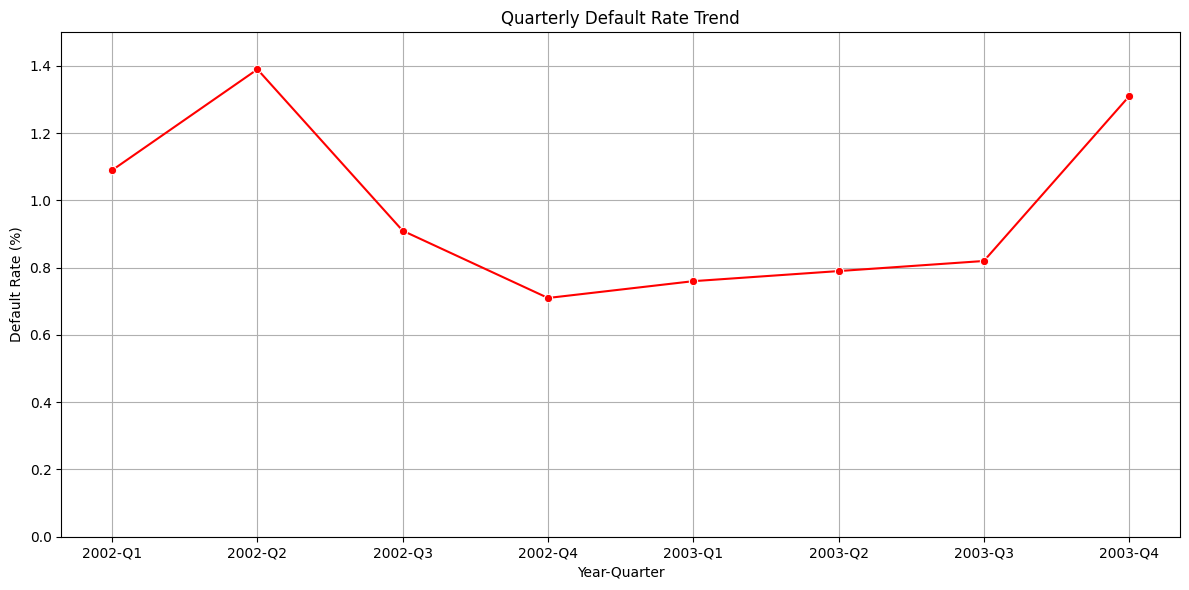

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="Year_Quarter", y="DEFAULT_RATE(%)", marker="o", color="red")

plt.xticks(rotation=45)
plt.xlabel("Year-Quarter")
plt.ylabel("Default Rate (%)")
plt.title("Quarterly Default Rate Trend")
plt.xticks(rotation=0)
plt.ylim(0, 1.5)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **The percentage of the loan amount recovered after default, through foreclosure or other means.**

In [ ]:
from pyspark.sql.functions import col, sum, coalesce, when

df_defaulted = df_filtered.filter(col("LOAN_STATUS") == "Defaulted")

# Calculate the recovered amount based on proceeds columns (handling NULLs)
df_defaulted = df_defaulted.withColumn(
    "Total_Recovered",
    (coalesce(col("NET_SALES_PROCEEDS"), lit(0.0)) +
     coalesce(col("CREDIT_ENHANCEMENT_PROCEEDS"), lit(0.0)) +
     coalesce(col("REPURCHASES_MAKE_WHOLE_PROCEEDS"), lit(0.0)) +
     coalesce(col("OTHER_FORECLOSURE_PROCEEDS"), lit(0.0)))
)

# Replace NULL values in ORIG_UPB to avoid division errors
df_defaulted = df_defaulted.withColumn("ORIG_UPB", coalesce(col("ORIG_UPB"), lit(1.0)))

# Calculate overall total values
overall_recovery = df_defaulted.agg(
    sum("Total_Recovered").alias("Total_Recovered_Amount"),
    sum("ORIG_UPB").alias("Total_Loan_Amount")
)

overall_recovery = overall_recovery.withColumn(
    "Overall_Recovery_Rate", (col("Total_Recovered_Amount") / col("Total_Loan_Amount")) * 100
)

overall_recovery.show()

+----------------------+-----------------+---------------------+
|Total_Recovered_Amount|Total_Loan_Amount|Overall_Recovery_Rate|
+----------------------+-----------------+---------------------+
|   8.824345667999998E7|    5.83250198E11|  0.01512960595342995|
+----------------------+-----------------+---------------------+



The overall recovery rate is 1.51%, indicating that only a small fraction of the total loan amount was recovered through foreclosure or other means. This is potentially due to defaulted loans result in significant financial losses, with most of the outstanding balance remaining unrecovered.


#### **Plot average, median, and variance of property price changes over the entire duration, bucketed by month.**

Since ORIGINAL_LIST_PRICE and CURRENT_LIST_PRICE data was missing, tracking how much loan balance decreased over time gives insights into loan repayment trends. Hence, we took that approach to proceed with our analysis.

In [ ]:
df_price = df_filtered.withColumn(
    "YearMonth",
    concat_ws("-", col("Year"), col("Month"))  # Convert to "YYYY-MM" string format
)

df_price = df_price.withColumn("YearMonthDate", to_date(col("YearMonth"), "yyyy-M"))

# Compute Absolute Price Change Using CURRENT_UPB and ORIG_UPB (Handling NULLs)
df_price = df_price.withColumn(
    "Price_Change",
    abs(coalesce(col("CURRENT_UPB"), lit(0.0)) - coalesce(col("ORIG_UPB"), lit(0.0)))
)

# Aggregate Monthly Statistics
df_price_stats = df_price.groupBy("YearMonth").agg(
    mean("Price_Change").alias("Avg_Price_Change"),
    percentile_approx("Price_Change", 0.5, 1000).alias("Median_Price_Change"),  # Computes the median
    variance("Price_Change").alias("Variance_Price_Change")
).withColumn("YearMonthDate", to_date(col("YearMonth"), "yyyy-M")) \
.orderBy("YearMonthDate")  # Sort correctly

df_price_stats.select("YearMonth", "Avg_Price_Change", "Median_Price_Change", "Variance_Price_Change").show(24)


+---------+------------------+-------------------+---------------------+
|YearMonth|  Avg_Price_Change|Median_Price_Change|Variance_Price_Change|
+---------+------------------+-------------------+---------------------+
|   2002-1| 34690.04225092043| 11156.289999999994| 2.9113395087434096E9|
|   2002-2| 34387.72328596353|           10676.11|  2.982135944647481E9|
|   2002-3| 34129.22449219837| 10393.649999999994|  3.015032353364148E9|
|   2002-4| 34230.48522641352| 10129.959999999992| 3.0263317524515166E9|
|   2002-5| 33765.78017298873|            9934.25|  2.994307722233428E9|
|   2002-6| 33886.40683077705|           10351.04|  2.993465933733492E9|
|   2002-7| 34953.51966484073| 11605.779999999999|  3.001240760333447E9|
|   2002-8| 36320.76598983393| 13765.850000000006| 2.9090710885672545E9|
|   2002-9| 36687.73013107075| 15431.440000000002|  2.732065572316735E9|
|  2002-10| 36645.99215156767| 16241.559999999998|  2.636837990297232E9|
|  2002-11| 36334.42062661612|           16256.86| 

In [ ]:
df_plot = df_price_stats.toPandas()

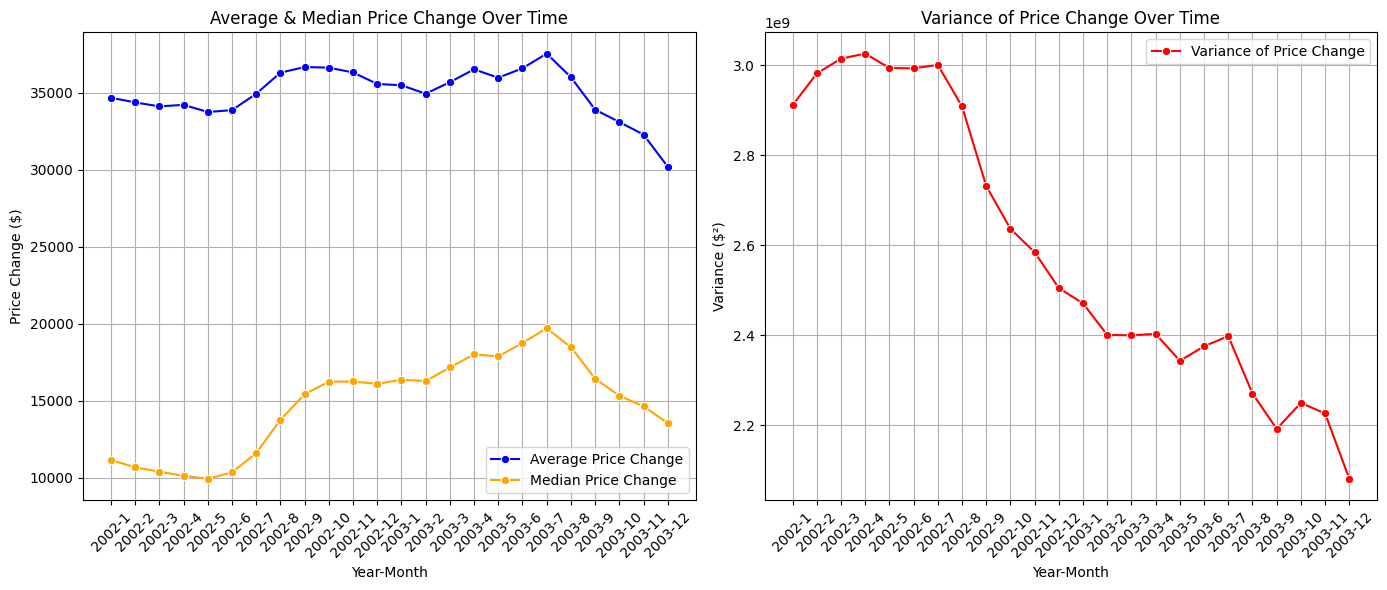

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})

Average & Median Price Change
sns.lineplot(ax=axes[0], data=df_plot, x="YearMonth", y="Avg_Price_Change", label="Average Price Change", marker="o", color="blue")
sns.lineplot(ax=axes[0], data=df_plot, x="YearMonth", y="Median_Price_Change", label="Median Price Change", marker="o", color="orange")

axes[0].set_xlabel("Year-Month")
axes[0].set_ylabel("Price Change ($)")
axes[0].set_title("Average & Median Price Change Over Time")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid()

sns.lineplot(ax=axes[1], data=df_plot, x="YearMonth", y="Variance_Price_Change", label="Variance of Price Change", marker="o", color="red")

axes[1].set_xlabel("Year-Month")
axes[1].set_ylabel("Variance ($²)")
axes[1].set_title("Variance of Price Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


The analysis shows that while average price changes remained relatively stable, there is a gradual increase in median price changes, suggesting a shift in values. The variance in price changes, however, declined significantly, indicating reduced fluctuations and possibly greater market stability over time. This trend may reflect evolving economic conditions, or changes in borrower risk profiles.